# Assignment

## Instructions



### Task: Building a Neural Network for Wine Classification

In this assignment, you will build and train a neural network using PyTorch to classify wine varieties based on their chemical attributes. You will use the Wine dataset, a classic machine learning dataset that contains the results of chemical analyses of wines grown in the same region in Italy but derived from three different cultivars.

#### Dataset

The Wine dataset consists of 13 features:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

The target variable is the class of wine (1, 2, or 3).

#### Requirements

1. Load the Wine dataset from scikit-learn
2. Preprocess the data (standardize features)
3. Split the data into training and testing sets
4. Build a multi-layer neural network using PyTorch with:
   - An input layer (matching the number of features)
   - At least one hidden layer with ReLU activation
   - An output layer with appropriate activation for classification
5. Train your model using an appropriate loss function and optimizer
6. Evaluate your model's performance on the test set
7. Experiment with different network architectures or hyperparameters to improve performance

#### Starter Code

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

WineClassifier(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
)
Epoch [10/100], Loss: 0.9501
Epoch [20/100], Loss: 0.8086
Epoch [30/100], Loss: 0.6393
Epoch [40/100], Loss: 0.4567
Epoch [50/100], Loss: 0.2990
Epoch [60/100], Loss: 0.1913
Epoch [70/100], Loss: 0.1255
Epoch [80/100], Loss: 0.0862
Epoch [90/100], Loss: 0.0617
Epoch [100/100], Loss: 0.0454


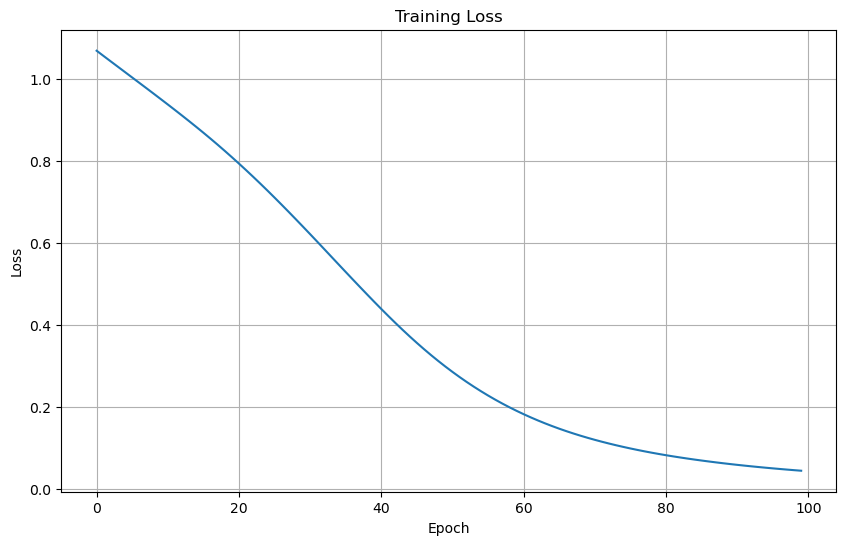

Test Accuracy: 1.0000

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



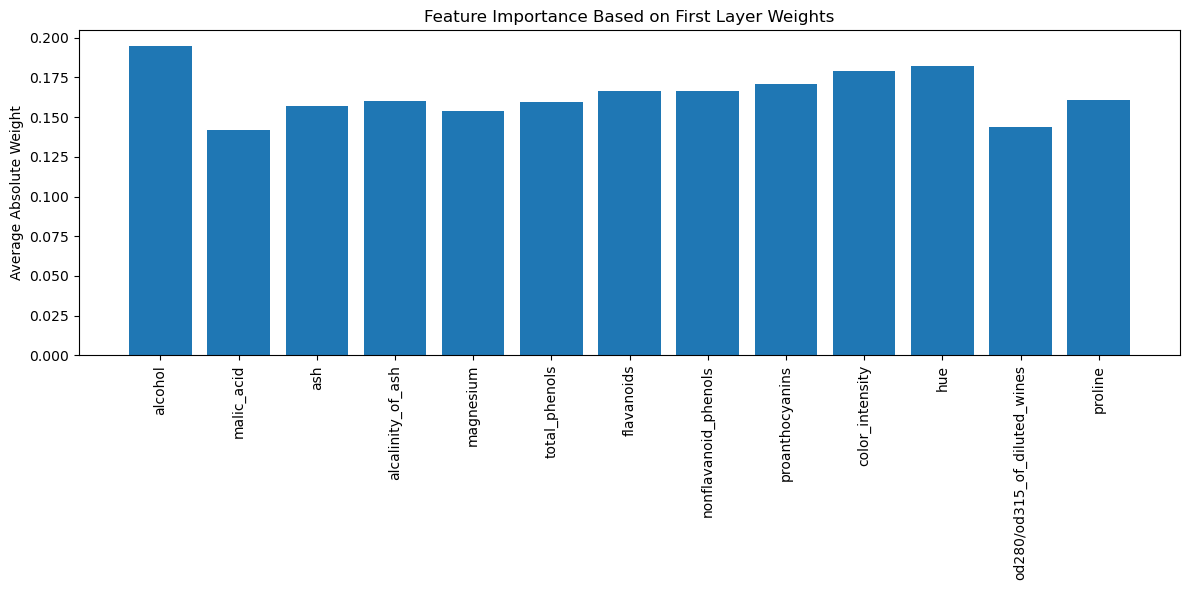

Model saved to 'wine_classifier.pth'
Sample features: [ 0.78980621  0.68550197  0.70724686 -1.28970717  1.14155847  0.64876424
  1.00469996 -1.54592178  0.12107098  0.01812906  0.01119018  1.05695159
  0.3124203 ]
Predicted wine type: class_1
Actual wine type: class_0


In [4]:
# Define your neural network
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(WineClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Initialize the network
input_size = X_train.shape[1]  # 13 features
hidden_size = 64
num_classes = 3   # 3 types of wine

model = WineClassifier(input_size, hidden_size, num_classes)
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32
losses = []

# Implement training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record loss
    losses.append(loss.item())

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Evaluate the model on test data
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())
    conf_matrix = confusion_matrix(y_test, predicted.numpy())

    print(f'Test Accuracy: {accuracy:.4f}')
    print('\nConfusion Matrix:')
    print(conf_matrix)
    print('\nClassification Report:')
    print(classification_report(y_test, predicted.numpy(), target_names=wine.target_names))

# Visualize feature importance
def visualize_feature_importance():
    # Get the weights of the first layer
    weights = model.fc1.weight.data.abs().mean(dim=0).numpy()
    feature_names = wine.feature_names

    # Create a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(feature_names, weights)
    plt.xticks(rotation=90)
    plt.title('Feature Importance Based on First Layer Weights')
    plt.ylabel('Average Absolute Weight')
    plt.tight_layout()
    plt.show()

visualize_feature_importance()

# Save the model
torch.save(model.state_dict(), 'wine_classifier.pth')
print("Model saved to 'wine_classifier.pth'")

# Example of using the model for prediction
def predict_wine(features):
    # Scale the features using the same scaler
    scaled_features = scaler.transform([features])

    # Convert to tensor
    features_tensor = torch.FloatTensor(scaled_features)

    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = model(features_tensor)
        _, predicted = torch.max(outputs, 1)

    return wine.target_names[predicted.item()]

# Example usage:
sample_features = X_test[0]  # Using the first test sample
predicted_wine = predict_wine(sample_features)
actual_wine = wine.target_names[y_test[0]]

print(f"Sample features: {sample_features}")
print(f"Predicted wine type: {predicted_wine}")
print(f"Actual wine type: {actual_wine}")

## Submission

- Submit the URL of the GitHub Repository that contains your work to NTU black board.
- Should you reference the work of your classmate(s) or online resources, give them credit by adding either the name of your classmate or URL.